In [1]:
# import needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.colors import BoundaryNorm, ListedColormap

In [2]:
stores = pd.read_csv('./stores.csv')

In [3]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [4]:
stores.cluster.value_counts()

3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: cluster, dtype: int64

In [5]:
stores.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [6]:
stores.type.value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [7]:
stores.state.value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

In [8]:
holidays = pd.read_csv('./holidays_events.csv')

In [9]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [10]:
transactions = pd.read_csv('./transactions.csv')

In [11]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
transactions.store_nbr.value_counts()

39    1678
38    1678
26    1678
31    1678
33    1678
34    1678
37    1678
27    1677
28    1677
32    1677
23    1677
40    1677
41    1677
44    1677
45    1677
46    1677
47    1677
48    1677
50    1677
51    1677
49    1677
2     1677
16    1677
5     1677
54    1676
3     1676
4     1676
6     1676
8     1676
9     1676
19    1676
35    1676
13    1676
1     1676
15    1676
11    1676
10    1675
7     1675
17    1674
43    1672
30    1655
14    1638
12    1616
25    1615
24    1577
18    1566
36    1551
53    1167
20     909
29     874
21     748
42     720
22     671
52     118
Name: store_nbr, dtype: int64

In [13]:
oil = pd.read_csv('./oil.csv')

In [14]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [15]:
oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [16]:
train_csv = pd.read_csv('./train.csv')

In [17]:
train_csv.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [18]:
len(train_csv)

3000888

In [19]:
train_csv.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

Convert the date to datetime object

In [20]:
train_csv["date"] = pd.to_datetime(train_csv["date"])

In [21]:
train_csv.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [22]:
train_df = train_csv.set_index('date')

In [23]:
train_df.family.value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

Make list of unique "family" names

In [24]:
family_values = train_df.family.unique()

Make a new dataframe for each "family"

In [25]:
family_df = []

In [26]:
for i in family_values:
    family_df.append(train_df[train_df.family == i])

Index 0 df is all of the data for the family "Automotive"

In [27]:
family_df[0]

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,33,10,AUTOMOTIVE,0.0,0
2013-01-01,66,11,AUTOMOTIVE,0.0,0
2013-01-01,99,12,AUTOMOTIVE,0.0,0
2013-01-01,132,13,AUTOMOTIVE,0.0,0
...,...,...,...,...,...
2017-08-15,3000723,54,AUTOMOTIVE,8.0,0
2017-08-15,3000756,6,AUTOMOTIVE,7.0,0
2017-08-15,3000789,7,AUTOMOTIVE,5.0,0


In [28]:
# checksum to be sure the for loop worked correctly
train_df[train_df.family == "AUTOMOTIVE"]

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,33,10,AUTOMOTIVE,0.0,0
2013-01-01,66,11,AUTOMOTIVE,0.0,0
2013-01-01,99,12,AUTOMOTIVE,0.0,0
2013-01-01,132,13,AUTOMOTIVE,0.0,0
...,...,...,...,...,...
2017-08-15,3000723,54,AUTOMOTIVE,8.0,0
2017-08-15,3000756,6,AUTOMOTIVE,7.0,0
2017-08-15,3000789,7,AUTOMOTIVE,5.0,0


Make a list of all unique store numbers

In [29]:
store_id = family_df[0].store_nbr.unique()

In [30]:
store_id

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

Plot an exploratory time series graph for each stores' sales

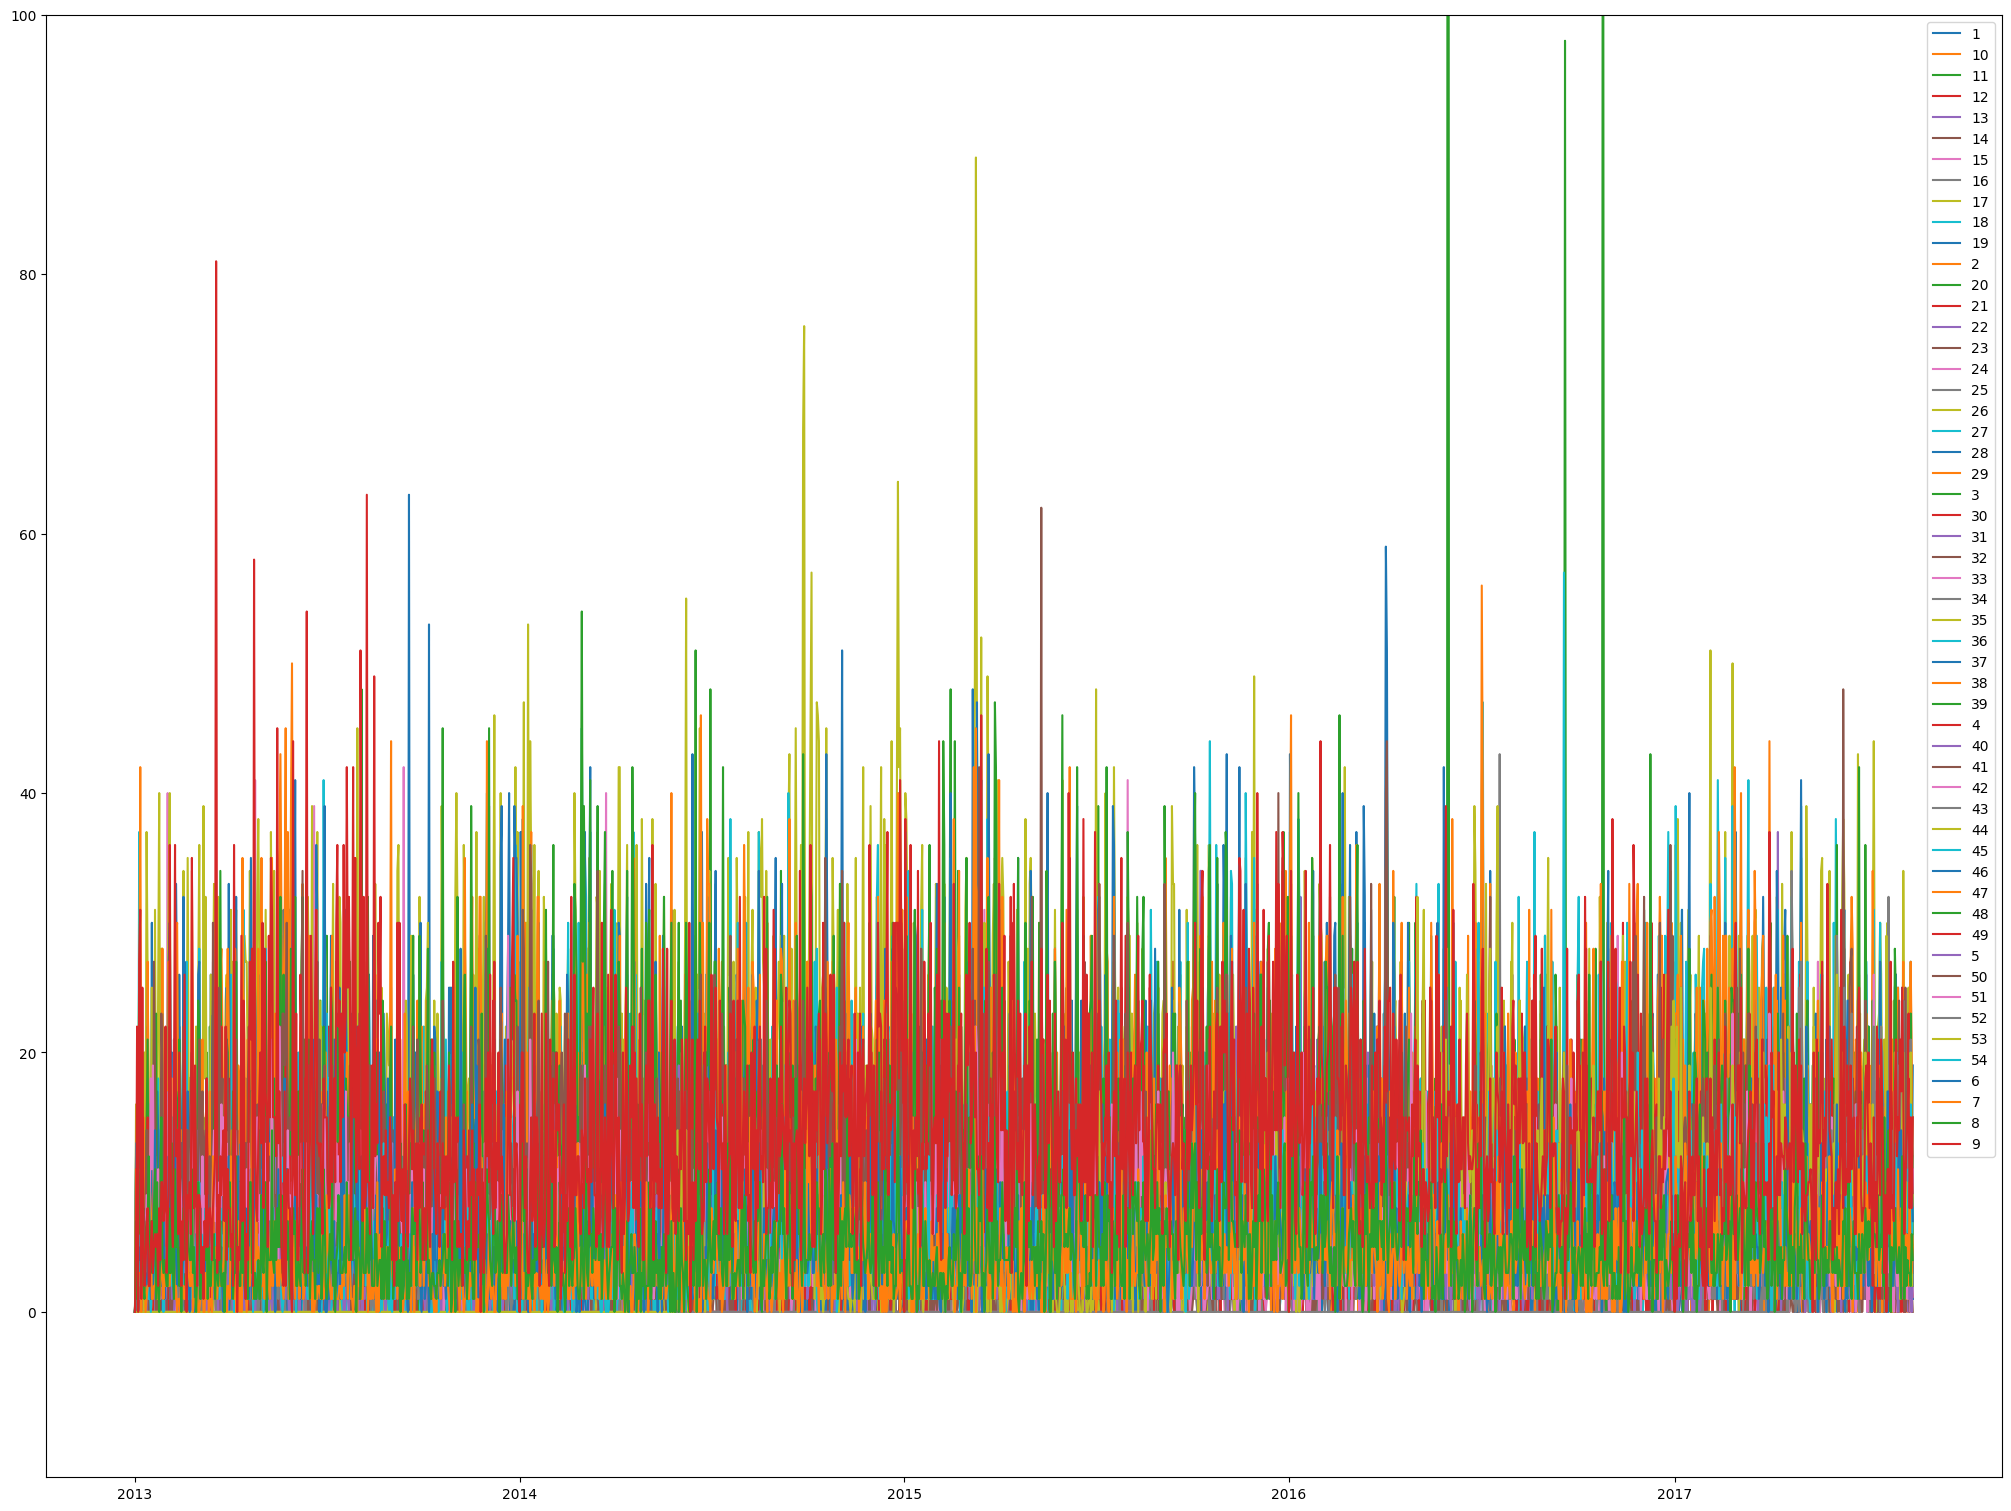

In [31]:
#plt.plot(family_df[0].date, family_df[0].sales, colors=family_df[0].store_nbr)
fig, ax = plt.subplots(figsize=(20,15), layout='constrained')
for i in store_id:
    ax.plot(family_df[0][family_df[0].store_nbr == i]['sales'], label=i)

    
plt.ylim(top=100)
plt.legend()
plt.show()

Way too messy

Plot a single time series of sales

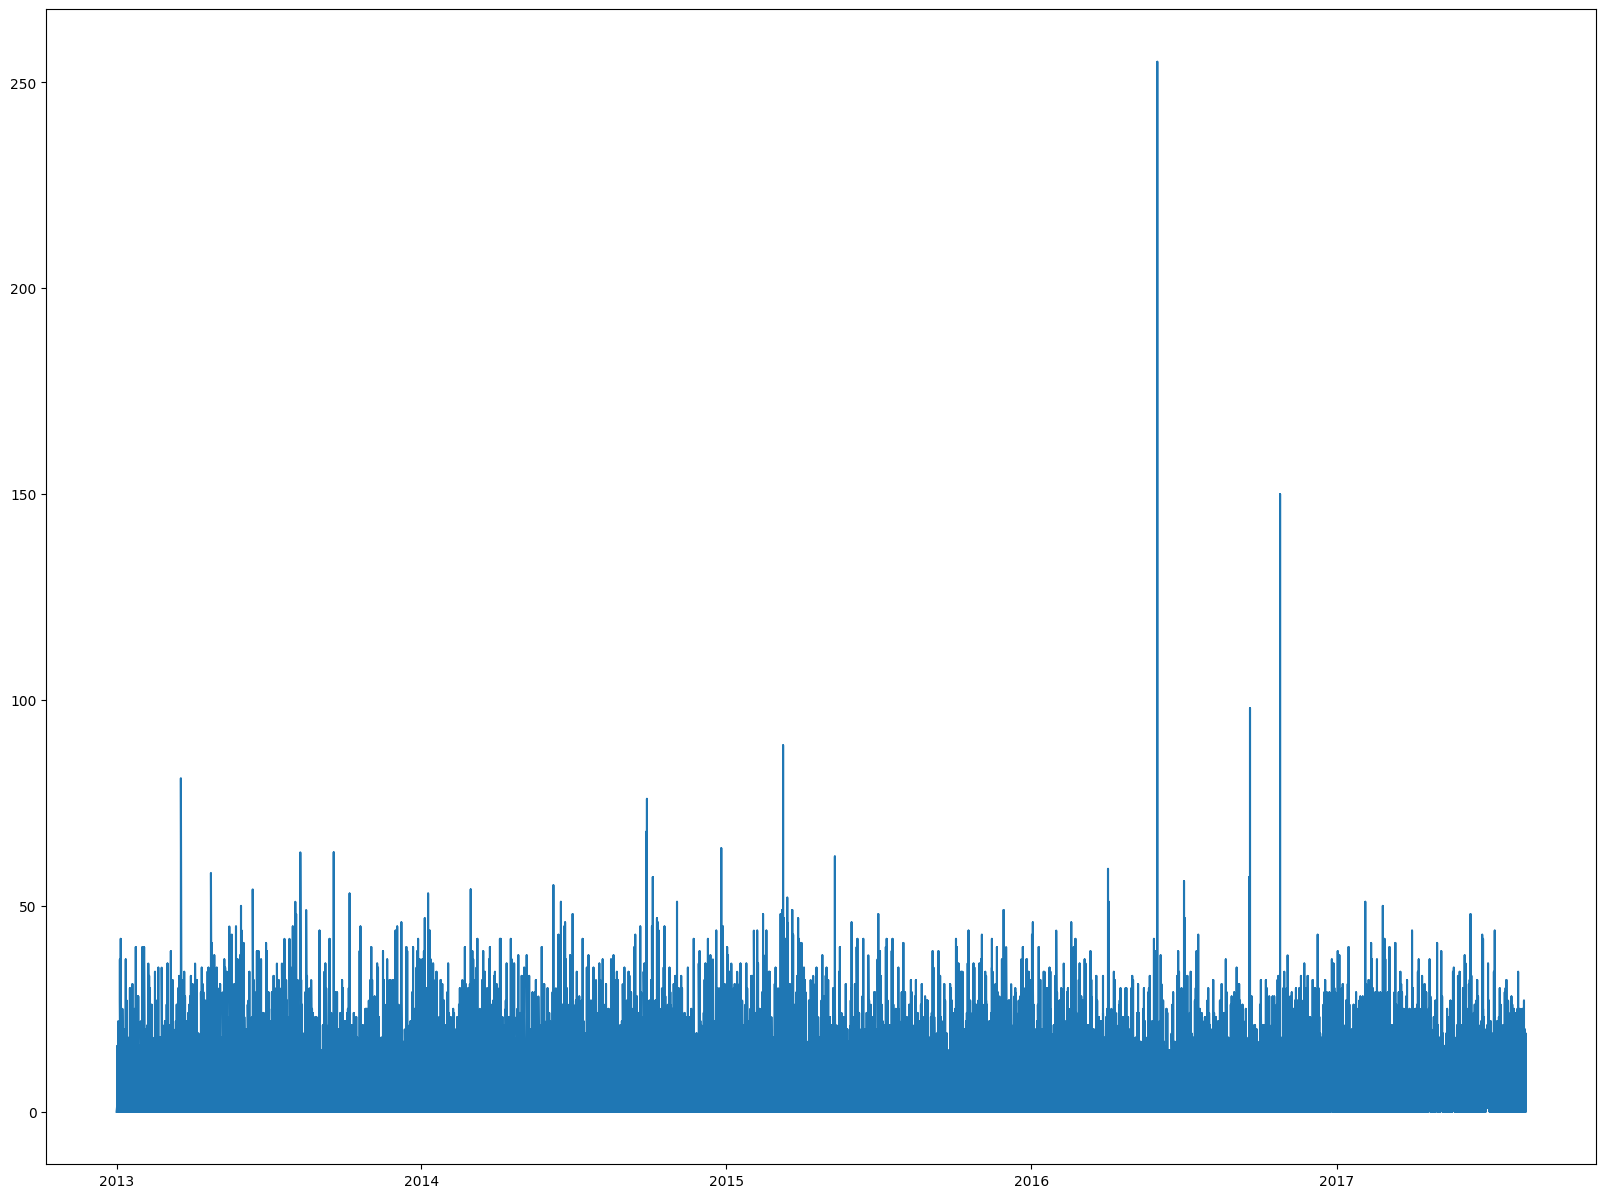

In [32]:
plt.figure(figsize=(20,15))
plt.plot(family_df[0]['sales'])


Still undecipherable

We need to group by date and aggregate if we want to see how well the chain does overall (not by store)

In [33]:
fam_auto_sum = family_df[0].groupby('date').agg('sum').drop(columns=['id','store_nbr'])

C:\Users\Joseph Shire\AppData\Local\Temp\ipykernel_21804\1595541961.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fam_auto_sum = family_df[0].groupby('date').agg('sum').drop(columns=['id','store_nbr'])


In [34]:
fam_auto_sum

,sales,onpromotion
date,,
2013-01-01,0.0,0
2013-01-02,255.0,0
2013-01-03,161.0,0
2013-01-04,169.0,0
2013-01-05,342.0,0
...,...,...
2017-08-11,441.0,0
2017-08-12,403.0,1
2017-08-13,481.0,0


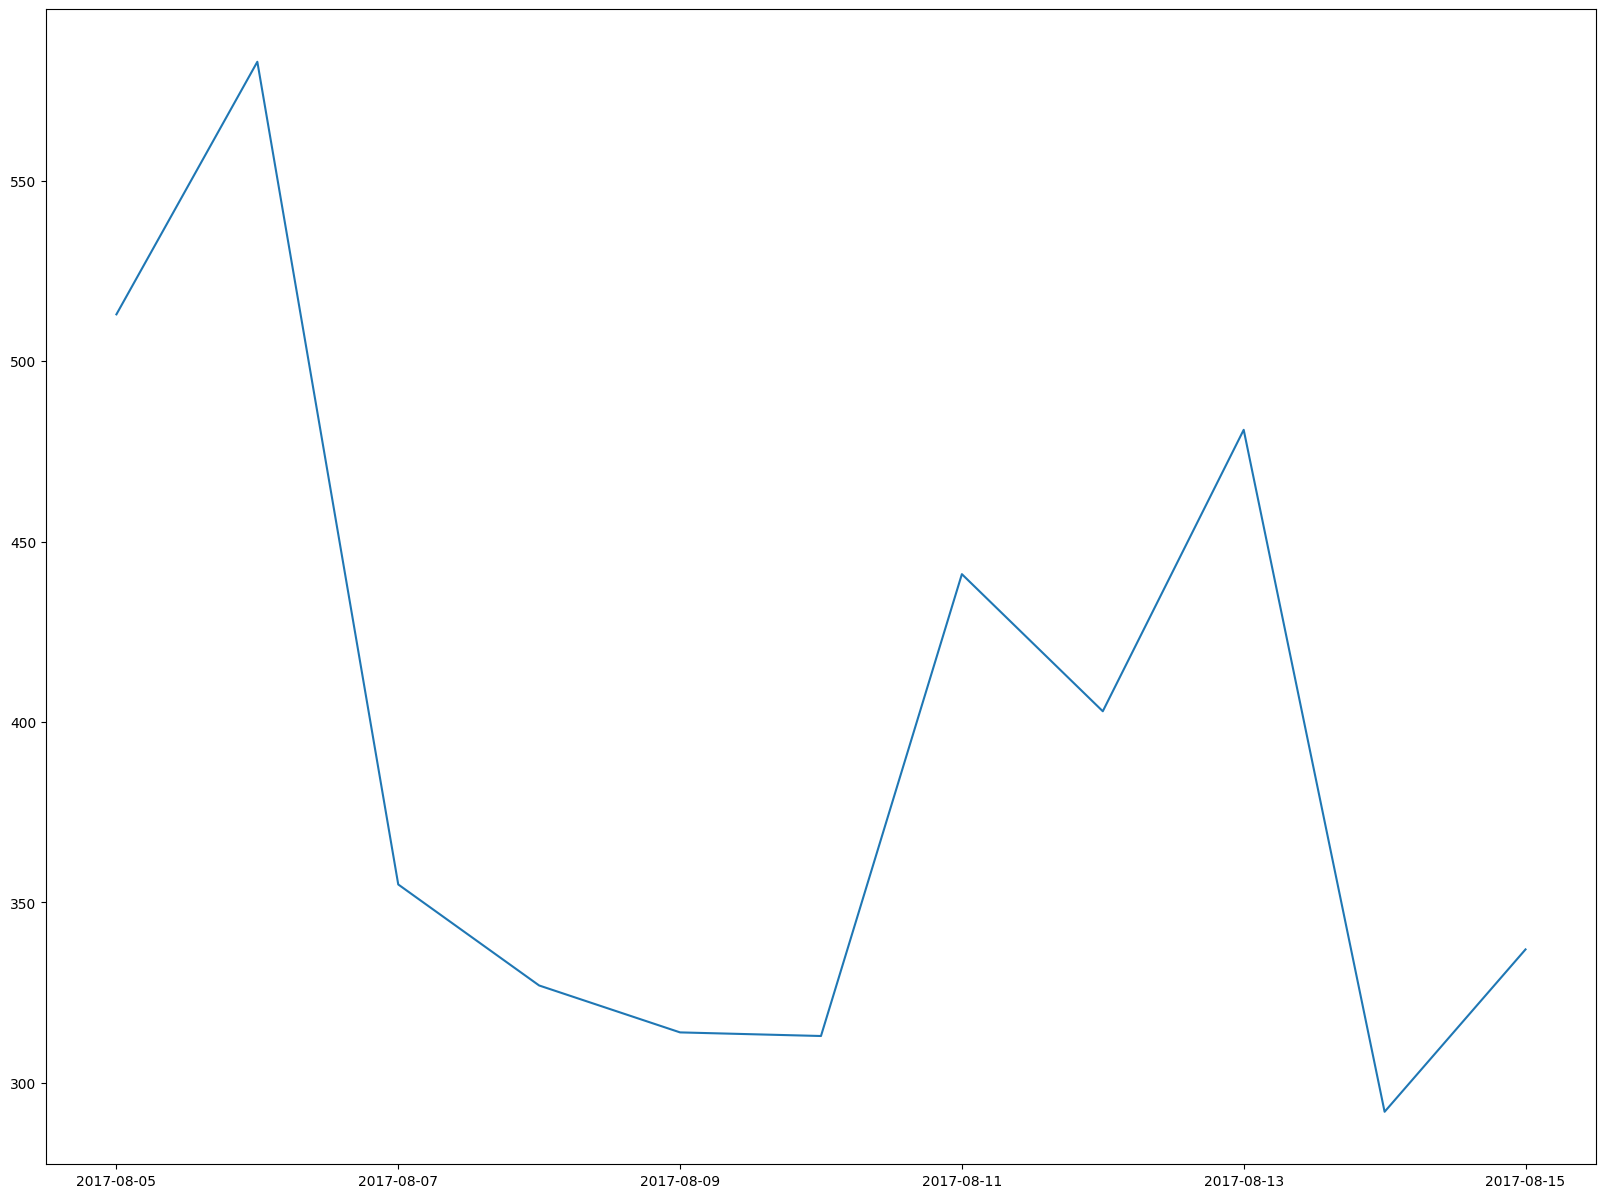

In [35]:
date_var = '08-04-2017'
fam_sum_date_restricted = fam_auto_sum[fam_auto_sum.index>date_var]
plt.figure(figsize=(20,15))
plt.plot(fam_sum_date_restricted['sales'])

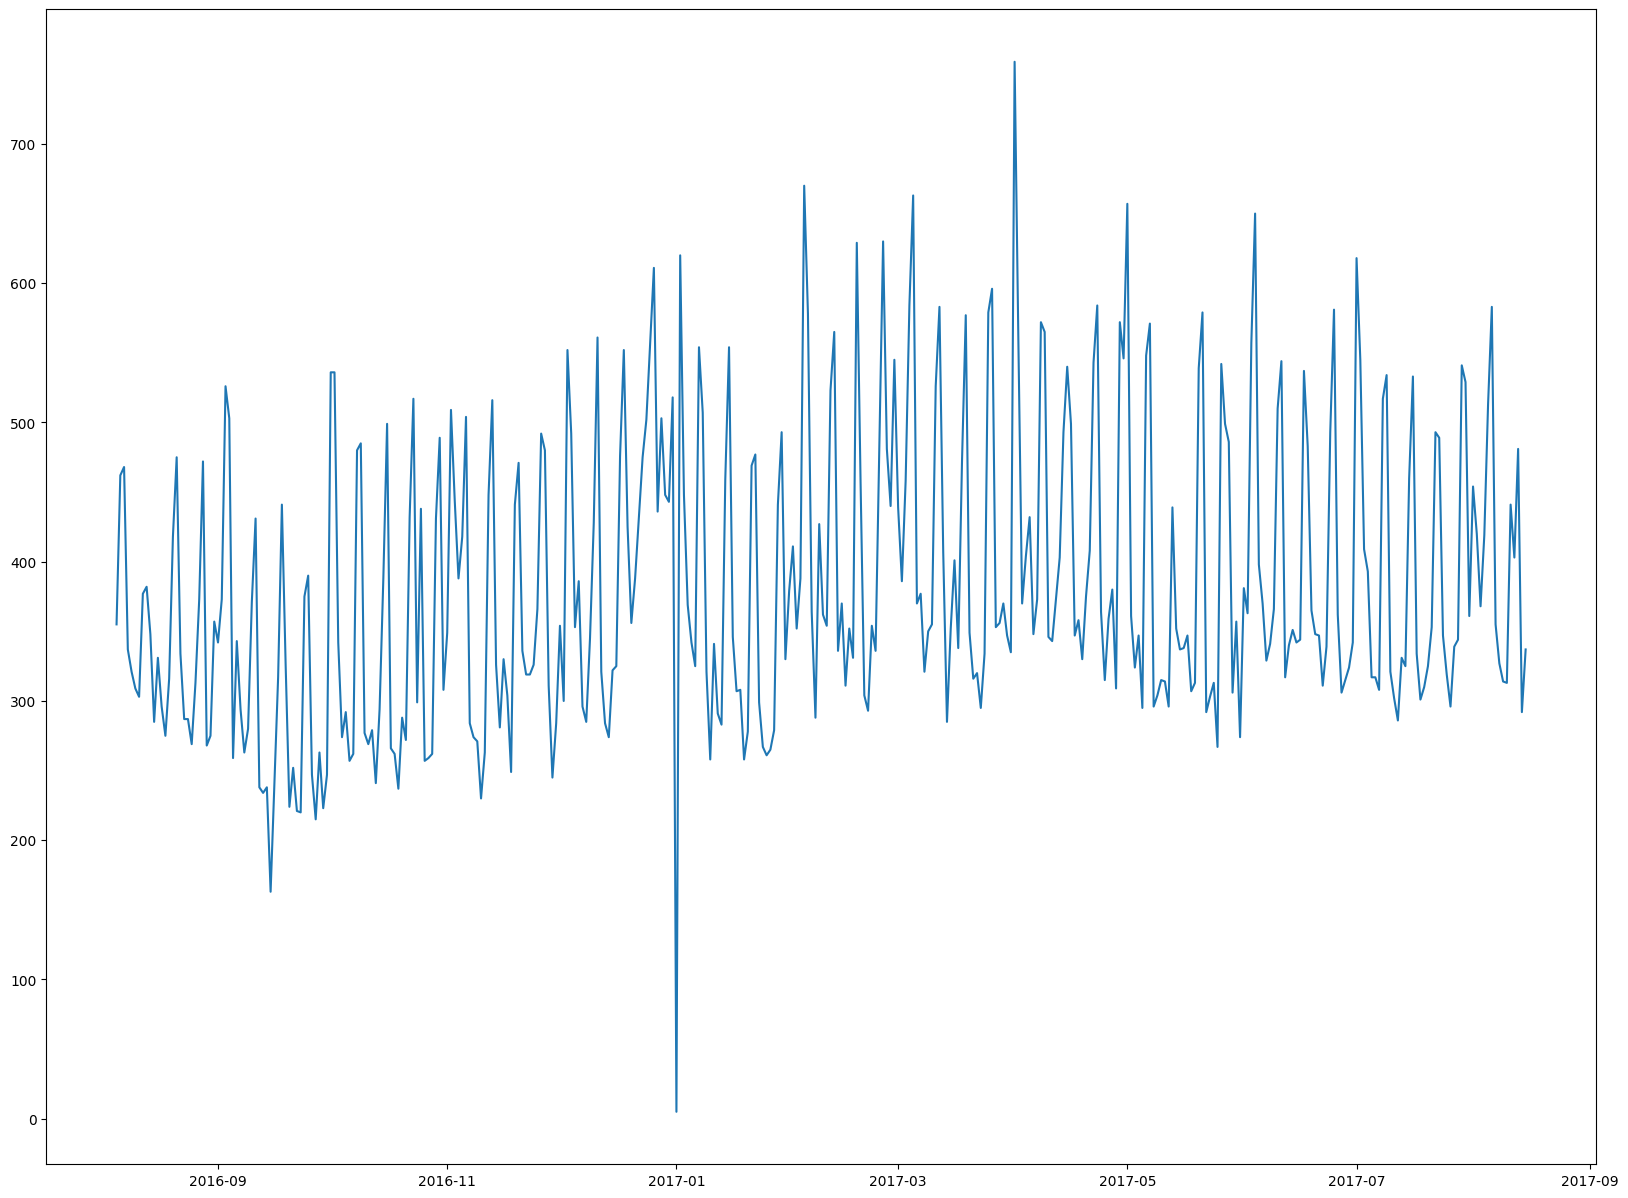

In [36]:
date_var = '08-04-2016'
fam_sum_date_restricted = fam_auto_sum[fam_auto_sum.index>date_var]
plt.figure(figsize=(20,15))
plt.plot(fam_sum_date_restricted['sales'])

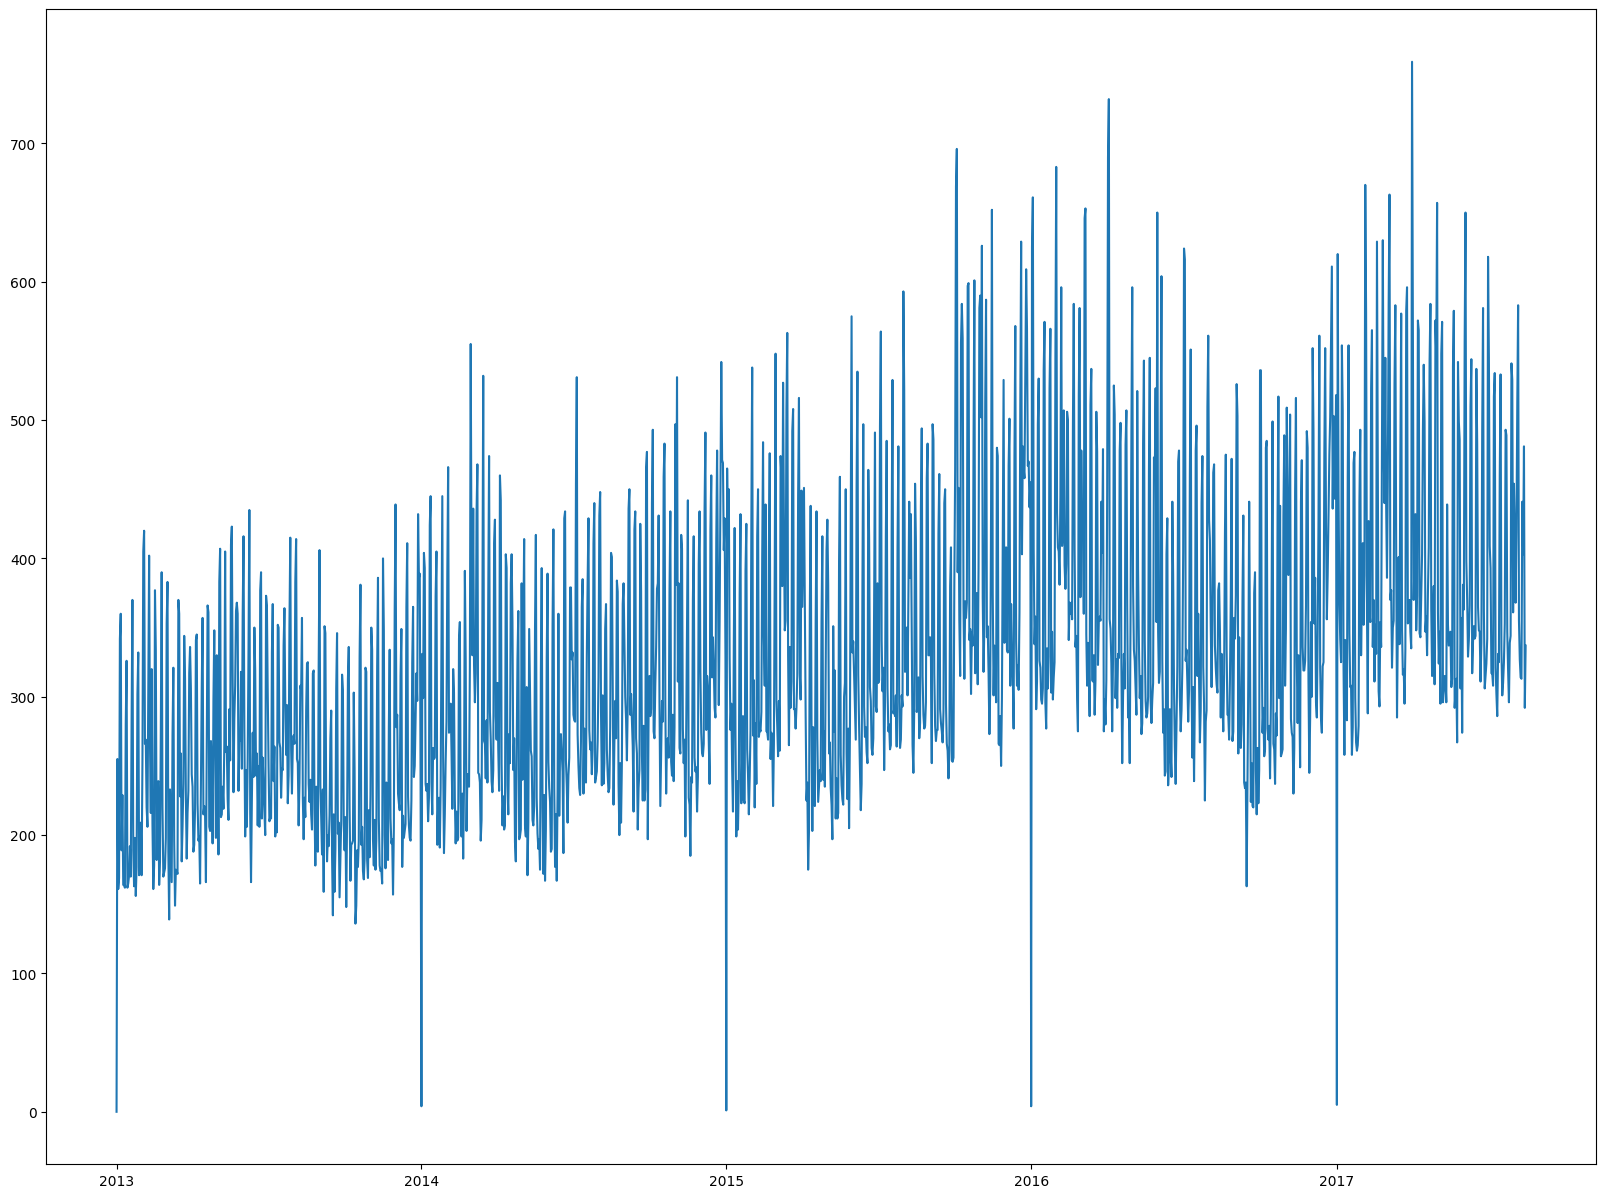

In [37]:
plt.figure(figsize=(20,15))
plt.plot(fam_auto_sum['sales'])

In [38]:
# assume zeros are the same as the following days
#fam_auto_sum['sales'].replace(to_replace = 0, value = fam_auto_sum['sales'].mean(), inplace=True)

In [39]:
fam_auto_sum.head()

,sales,onpromotion
date,,
2013-01-01,0.0,0
2013-01-02,255.0,0
2013-01-03,161.0,0
2013-01-04,169.0,0
2013-01-05,342.0,0


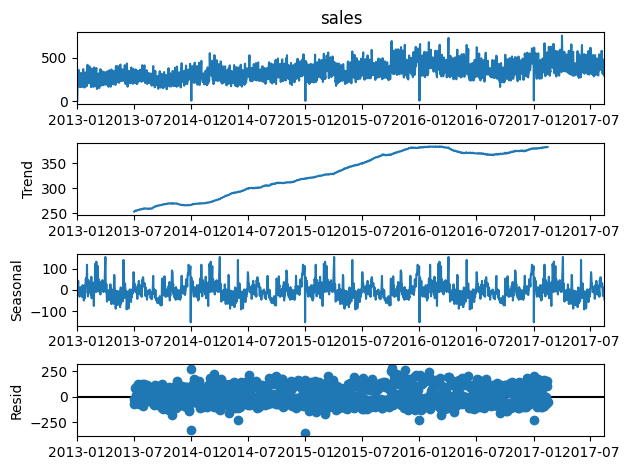

In [40]:
result = seasonal_decompose(fam_auto_sum['sales'],model='additive',period=365)

# Plot the original data, the trend, the seasonality, and the residuals 
result.plot();

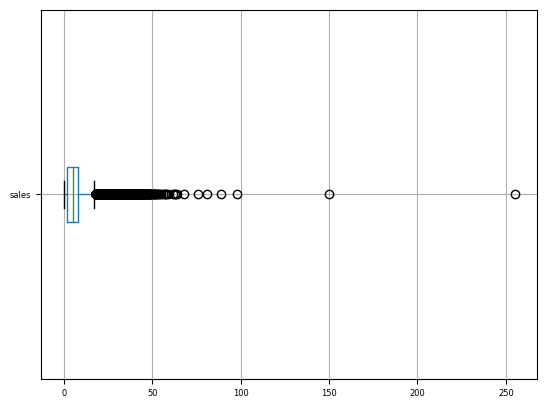

In [41]:
family_df[0][['sales']].boxplot(fontsize=6, vert=False)
plt.show()

In order to make intelligable and actionable analysis and decisions, we need to subdivide the data into similar groups. If we don't, then we would produce too many analyses

In [42]:
n_stores = len(train_df.store_nbr.unique())
n_product_cats = len(train_df.family.unique())
print("Number of stores: {}, number of product types: {}, maximum possible time series: {}".format(n_stores,n_product_cats,n_stores*n_product_cats))

Number of stores: 54, number of product types: 33, maximum possible time series: 1782


There are 4 viable grouping options predetermined for us in the data: city, stsae, type, and cluster.

We will merge pertinent data together to get an idea of how to best group the data for our analysis

In [43]:
store_info_csv = train_csv.merge(stores,on=['store_nbr']).set_index('date')
store_info = store_info_csv.drop(columns=['id'])
store_info.head()

,store_nbr,family,sales,onpromotion,city,state,type,cluster
date,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


The way that we can approach this problem is to make a correlation matrix for each family of propducts for each of the 4 grouping options, and determine which grouping has the highest correlations.

We create a function that can take a dataframe, as well as a target_column, an index_column, a compare_column, a grouping_column, and drop_columns, and outputs the mean correlation coefficient of the whole matrix for each family of products and subcategory.

In [45]:
def hm(df, target_column, index_column, compare_column, grouping_column, drop_columns=None):
    
    output = []
    
    if drop_columns != None:
        df1 = df.drop(columns=drop_columns)
    else:
        df1 = df
    
    try_columns = df1.loc[:, ~df1.columns.isin([target_column,grouping_column,compare_column])].columns

    for i in try_columns:
        for j in df1[i].unique():
            for n in df1[grouping_column].unique():

                df2 = df1[(df1[i]==j) & (df1[grouping_column] == n)]

                df3 = pd.pivot_table(df2, values=target_column, index=df2.index, columns=[compare_column])

                df4 = np.triu(df3.corr())
                df_mean = df4.mean().mean()
                output.append((i,j,n,df_mean))
    
    output_df = pd.DataFrame(output, columns=["category_type","category","family","correlation_mean"])
    return output_df    


In [46]:
output_df = hm(store_info_csv,target_column='sales',index_column='date',compare_column='store_nbr',grouping_column='family',drop_columns=['id','onpromotion'])
output_df

,category_type,category,family,correlation_mean
0,city,Quito,AUTOMOTIVE,0.142868
1,city,Quito,BABY CARE,NaN
2,city,Quito,BEAUTY,0.237320
3,city,Quito,BEVERAGES,0.438136
4,city,Quito,BOOKS,NaN
...,...,...,...,...
1975,cluster,17,POULTRY,1.000000
1976,cluster,17,PREPARED FOODS,1.000000
1977,cluster,17,PRODUCE,1.000000
1978,cluster,17,SCHOOL AND OFFICE SUPPLIES,1.000000


In [47]:
sort_out = output_df[output_df['correlation_mean']!=1].sort_values('correlation_mean',ascending=False)
sort_out.head(20)

,category_type,category,family,correlation_mean
1086,state,Los Rios,PRODUCE,0.741876
987,state,Tungurahua,PRODUCE,0.739724
294,city,Ambato,PRODUCE,0.739724
1668,cluster,9,HOME CARE,0.737725
1680,cluster,9,PRODUCE,0.737232
789,state,Cotopaxi,PRODUCE,0.736903
96,city,Latacunga,PRODUCE,0.736903
282,city,Ambato,HOME CARE,0.733911
975,state,Tungurahua,HOME CARE,0.733911
1074,state,Los Rios,HOME CARE,0.730651


List all Category Type and Category combinations, with associated correlation means (excluding those combos which only had one store (meaning that the correlation was 1.0))

In [48]:
group_out = output_df.groupby(['category_type','category']).agg('mean')
group_out_multi = group_out[group_out['correlation_mean']!=1]
group_out_multi

C:\Users\Joseph Shire\AppData\Local\Temp\ipykernel_21804\656207091.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_out = output_df.groupby(['category_type','category']).agg('mean')


correlation_mean
category_type category                                        
city          Ambato                                  0.630186
              Cuenca                                  0.446649
              Guayaquil                               0.282340
              Latacunga                               0.596215
              Machala                                 0.609402
              Manta                                   0.548241
              Quito                                   0.297922
              Santo Domingo                           0.417340
cluster       1                                       0.444799
              2                                       0.558067
              3                                       0.307627
              4                                       0.506582
              6                                       0.348505
              7                                       0.565320
              8                                       0.528010
              9                                       0.625708
              10                                      0.342436
              11                                      0.449861
              13                                      0.387665
              14                                      0.524676
              15                                      0.367842
state         Azuay                                   0.446649
              Cotopaxi                                0.596215
              El Oro                                  0.609402
              Guayas                                  0.261487
              Los Rios                                0.627646
              Manabi                                  0.416263
              Pichincha                               0.293655
              Santo Domingo de los Tsachilas          0.417340
              Tungurahua                              0.630186
type          A                                       0.357611
              B                                       0.310906
              C                                       0.238152
              D                                       0.255671
              E                                       0.422057

One last averaging to determine the best way to group these stores, using the Category Type to collapse down all sub-categories within.

In [49]:
final_grouping = group_out_multi.groupby('category_type').agg('mean')
final_grouping

,correlation_mean
category_type,
city,0.478537
cluster,0.458238
state,0.477649
type,0.316879


By a thin margain, "City" appears to be the best option for grouping, based on it having the highest correlation mean of the 4 category types. This is also the most intuative solution, due to individual cities serving similar clientele. The needs of a local, centralized populace (compared to larger states or the diasporateness of clusters or types) will be more homogenous. Further, it would be reasonable to theorize that people with similar needs and similar available stores will shop at the most convenient location (close to home or work).

While using Type would have made for much simpler analysis due to only having 5 sub-categories, compared to 22 cities.